# Boundary conditions


```{include} live.md
```

Here we explore the basic code with natural boundary conditions in a thin film.

In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


## Module

In [2]:
# %load glsp.py
# glsp.py: code to solve GL BVP and plot psi and b.

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def nat(x,h): # natural BC with applied magnetizing field h
  def BC(Y):
    return [Y[1],Y[3]-h]
  return (x,BC)

def inf(x): # 'infinity' BC with b=da=0 f=1 or 0 at x='infinity'
  def BC(Y):
    return [Y[1],Y[3]]
  return (x,BC)

def nrm(x,r,h): # normal metal BC with parameter r.
  def BC(Y):
    return [Y[1]-r*Y[0],Y[3]-h]
  return (x,BC)

def SCP(x): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1]+2**(1/2)*kappa*(Y[0]-1),Y[3]+Y[2]]
  return (x,BC)

def NCM(x,h): # normal psi=0 with applied field h
  def BC(Y):
    r2=Y[2]**2+Y[0]**2-1
    return [Y[1]-kappa*r2**(1/2)*Y[0],Y[3]-h]
  return (x,BC)

def glsol(kappa,A,B):
  xa,AB=A
  xb,BB=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array(AB(Ya)+BB(Yb))
  rng=[xa, xb]
  X = np.linspace(*rng, nodes)
  Y0=[1 if x<0 else 1 for x in X]
  Y = np.vstack([Y0,np.zeros((3, X.size))])
  return solve_bvp(dY, bc, X, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  x_plot = np.linspace(A[0],B[0], 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"$\psi: {tex}$")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
  if not sol.success:
    print(f"kappa={kappa},tex={tex}:",sol.message)

## Thin films

We use the GL code to allow two surfaces with an applied field $h_0$ as boundaries.

### Varying external field

kappa=0.5,tex=h_0=1.20: The maximum number of mesh nodes is exceeded.


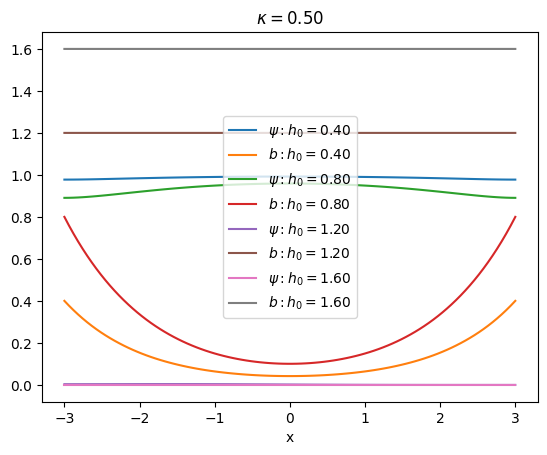

In [9]:
# slab/film with vacuum boundaries at x=-L/2 and x=L/2.

kappa=0.5
L=6
N=5
for k in range(1,N):
  h0=2*k/N
  glplot(kappa,nat(-L/2,h0),nat(L/2,h0),f"h_0={h0:.2f}")
plt.xlabel("x")
plt.title(f"$\kappa={kappa:.2f}$")
plt.legend()
plt.show()

$h_0=0.8$ still renders a superconducting state, although it is above the critical value $1/\sqrt2\approx0.71$. I suspect (and will investigate) that the non-superconducting state has a lower energy (Gibbs?).

### Varying $\kappa$

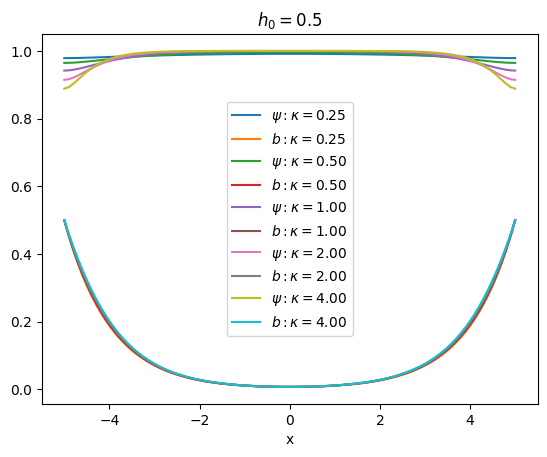

In [13]:
h0=1/2
L=10

for k in range(-2,3):
    kappa=2**k
    glplot(kappa,nat(-L/2,h0),nat(L/2,h0),f"\kappa={kappa:.2f}")

plt.xlabel("x")
plt.title(f"$h_0={h0}$")
plt.legend()
plt.show()